In [13]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import platform
import matplotlib.patches as patches

car = pd.read_csv('21_06전기_자동차현황(그래프용).csv')
hm_21 = pd.read_csv('21화물차지원금.csv')
sy_21 = pd.read_csv('21승용차지원금.csv')

In [14]:
car

,지역,승용차,승합차,화물차
0,서울,2700839,103178,327888
1,경기,5041944,200347,818406
2,인천,1421284,47291,194101
3,대구,1017764,29532,156555
4,제주,523916,18406,81393


In [15]:
car_2 = car.transpose()
car_2

,0,1,2,3,4
지역,서울,경기,인천,대구,제주
승용차,2700839,5041944,1421284,1017764,523916
승합차,103178,200347,47291,29532,18406
화물차,327888,818406,194101,156555,81393


In [16]:
car_2 = car.transpose()
car_2.rename(columns=car_2.iloc[0], inplace=True) # 행열이 전환된 데이터프레임의 열 이름 제대로 수정
car_2 = car_2.drop(car_2.index[0]) #지역 열 삭제
car_2.insert(0, '차종류' , ['승용차', '승합차' , '화물차']) #열추가
car_2 = car_2.reset_index(drop = True) #index 재설정
car_2

,차종류,서울,경기,인천,대구,제주
0,승용차,2700839,5041944,1421284,1017764,523916
1,승합차,103178,200347,47291,29532,18406
2,화물차,327888,818406,194101,156555,81393


In [17]:
sy_21

,지역,지원금
0,서울,391.774
1,경기,407.487
2,인천,419.273
3,대구,508.333
4,제주,401.390


In [18]:
sy_21_2 = sy_21.transpose()
sy_21_2.rename(columns=sy_21_2.iloc[0], inplace=True) # 행열이 전환된 데이터프레임의 열 이름 제대로 수정
sy_21_2 = sy_21_2.drop(sy_21_2.index[0])
sy_21_2

,서울,경기,인천,대구,제주
지원금,391.774,407.487,419.273,508.333,401.390


In [19]:
hm_21

,지역,지원금
0,서울,530.769
1,경기,594.535
2,인천,444.615
3,대구,471.429
4,제주,525.000


In [20]:
hm_21_2 = hm_21.transpose()
hm_21_2.rename(columns=hm_21_2.iloc[0], inplace=True) # 행열이 전환된 데이터프레임의 열 이름 제대로 수정
hm_21_2 = hm_21_2.drop(hm_21_2.index[0])
hm_21_2

,서울,경기,인천,대구,제주
지원금,530.769,594.535,444.615,471.429,525.000


In [21]:
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    matplotlib.rc('font', family='AppleGothic')
else: #linux
    matplotlib.rc('font', family='NanumGothic')
    
pd.options.display.float_format = '{:.3f}'.format #소수점 3자리의 실수로 표현해라
    
car1_total = car_2['서울'].sum() #서울 있는 열 다 더하기
car2_total = car_2['경기'].sum() #경기 있는 열 다 더하기
car3_total = car_2['인천'].sum() #인천 있는 열 다 더하기
car4_total = car_2['대구'].sum() #대구 있는 열 다 더하기
car5_total = car_2['제주'].sum() #제주 있는 열 다 더하기

car_s_total = car.iloc[2]
#print(car_s_total)

car1_a = (car_2['서울']/car1_total) #승용차 있는 열 다 더한값에 승용차 열의 각행 값을 나눈 값을 car1_a 시리즈에 저장해라 
car2_a = (car_2['경기']/car2_total) #승용차 있는 열 다 더한값에 승용차 열의 각행 값을 나눈 값을 car2_a 시리즈에 저장해라
car3_a = (car_2['인천']/car3_total) #승용차 있는 열 다 더한값에 승용차 열의 각행 값을 나눈 값을 car3_a 시리즈에 저장해라
car4_a = (car_2['대구']/car4_total) #승용차 있는 열 다 더한값에 승용차 열의 각행 값을 나눈 값을 car4_a 시리즈에 저장해라
car5_a = (car_2['제주']/car5_total) #승용차 있는 열 다 더한값에 승용차 열의 각행 값을 나눈 값을 car5_a 시리즈에 저장해라
#print(type(car1_a))
car_final = pd.concat([car1_a,car2_a,car3_a,car4_a,car5_a], axis=1) #car1_a~3_a 의 시리즈를 car_final의 데이터프레임에 합쳐라.

#print(type(car_final))
do = pd.DataFrame({
    '차종류' : ['승용차', '승합차', '화물차'] 
}) #DataFrame을 생성 지역 열에 승용~화물 행 생성

car_final = pd.concat([do, car_final], axis=1) #do 변수에 저장되어있는 데이터프레임에, car_final 변수에 저장되어 있는 열 합치기
#car1_a, car2_a, car3_a 3개 합치기
car_final

,차종류,서울,경기,인천,대구,제주
0,승용차,0.862,0.832,0.855,0.845,0.840
1,승합차,0.033,0.033,0.028,0.025,0.030
2,화물차,0.105,0.135,0.117,0.130,0.130


In [22]:
car_4 = car_final.transpose()
car_4.rename(columns=car_4.iloc[0], inplace=True) # 행열이 전환된 데이터프레임의 열 이름 제대로 수정
car_4 = car_4.drop(car_4.index[0]) #지역 열 삭제
car_4.insert(0, '지역' , ['서울', '경기' , '인천' , '대구' , '제주']) #열추가
car_4 = car_4.reset_index(drop = True) #index 재설정
car_4

,지역,승용차,승합차,화물차
0,서울,0.862,0.033,0.105
1,경기,0.832,0.033,0.135
2,인천,0.855,0.028,0.117
3,대구,0.845,0.025,0.130
4,제주,0.840,0.030,0.130


In [23]:
seoul = car_4.iloc[:1,:]
seoul

,지역,승용차,승합차,화물차
0,서울,0.862,0.033,0.105


In [61]:
d = car_4.iloc[:,3]
d

0   0.105
1   0.135
2   0.117
3   0.130
4   0.130
Name: 화물차, dtype: object

In [24]:
sy_per = car_4.iloc[: , :2]
sy_per

,지역,승용차
0,서울,0.862
1,경기,0.832
2,인천,0.855
3,대구,0.845
4,제주,0.840


In [64]:
hm_per = car_4.iloc[:,[0,3]]
hm_per

,지역,화물차
0,서울,0.105
1,경기,0.135
2,인천,0.117
3,대구,0.130
4,제주,0.130


<IPython.core.display.Javascript object>


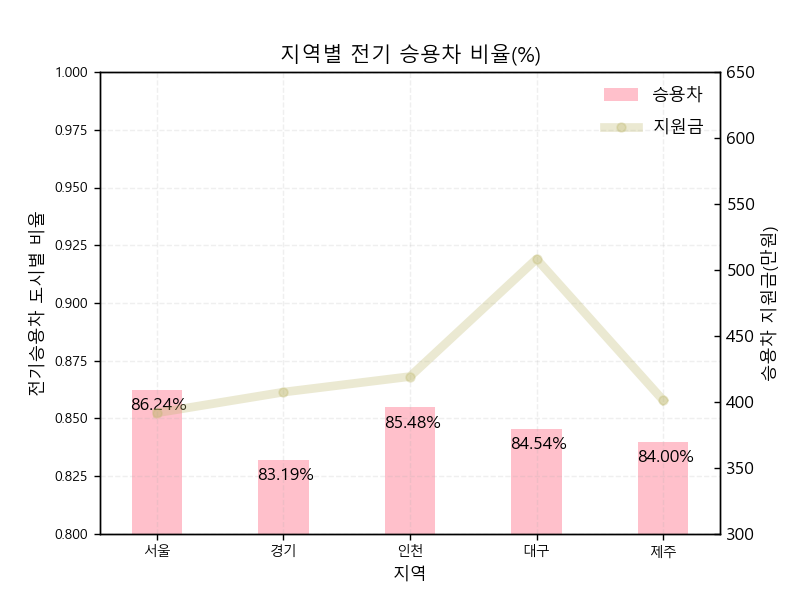

In [110]:
import pandas as pd
import numpy as np


ax = sy_per.plot(x='지역', kind='bar',  title='지역별 전기 승용차 비율(%)', width=0.4 ,fontsize = 8, color = 'pink')
#car_final의 그래프의 xlabel ='지역' bar그래프 형태 
car_sy = car_4.iloc[:,[0,1]] #모든 행 // 0열~3열
xlabel = ['서울', '경기', '인천', '대구', '제주']
ylabel1 = sy_21['지원금']
ylabel2 = car_sy['승용차']
ax.set_ylim(0.8, 1)
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.2f"%(height*100) + '%', xy=(left+width/1.85, bottom+height/1.008), ha='center', va='center' , fontsize = 10)
    #비율 위치
ax.set_ylabel('전기승용차 도시별 비율')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.2, linestyle='--')
ax2 = ax.twinx() #오른쪽 y축 겹쳐놓기
ax2.plot(xlabel, ylabel1, color='darkkhaki', marker = 'o',markersize=5, linewidth=5, alpha = 0.3) #꺽은선 그래프
ax2.set_ylim(300, 650) #오른 쪽 y축 값
ax2.set_ylabel('승용차 지원금(만원)')
ax2.tick_params(axis='y', direction='in')
ax.legend(labels = ['승용차'] , frameon = False)
ax2.legend(bbox_to_anchor = (1,0.93),labels = ['지원금'], frameon=False)
#plt.legend(labels = ['승용차'])
#ax2.legend(labels = ['지원금'])



<IPython.core.display.Javascript object>


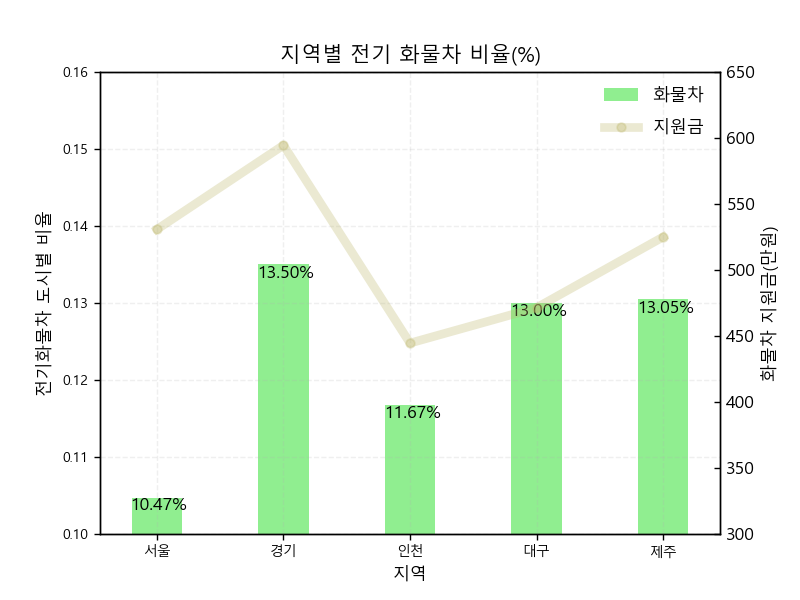

In [111]:
ax = hm_per.plot(x='지역', kind='bar',  title='지역별 전기 화물차 비율(%)', width=0.4 ,fontsize = 8, color = 'lightgreen')
#car_final의 그래프의 xlabel ='지역' bar그래프 형태 
car_hm = car_4.iloc[:,[0,3]] #모든 행 // 0열,3열
xlabel = ['서울', '경기', '인천', '대구', '제주']
ylabel1 = hm_21['지원금']
ylabel2 = car_hm['화물차']
ax.set_ylim(0.1, 0.16)
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.2f"%(height*100) + '%', xy=(left+width/1.85, bottom+height/1.009), ha='center', va='center' , fontsize = 10)
    #비율 위치
ax.set_ylabel('전기화물차 도시별 비율')

plt.xticks(rotation=0)
plt.grid(True, alpha=0.2, linestyle='--')
ax2 = ax.twinx() #오른쪽 y축 겹쳐놓기
ax2.plot(xlabel, ylabel1, color='darkkhaki', marker = 'o',markersize=5, linewidth=5, alpha = 0.3) #꺽은선 그래프
ax2.set_ylim(300, 650) #오른 쪽 y축 값
ax2.set_ylabel('화물차 지원금(만원)')
ax2.tick_params(axis='y', direction='in')
ax.legend(labels = ['화물차'] , frameon = False)
ax2.legend(bbox_to_anchor = (1,0.93),labels = ['지원금'], frameon=False)
#plt.legend(labels = ['승용차'])
#ax2.legend(labels = ['지원금'])


<IPython.core.display.Javascript object>


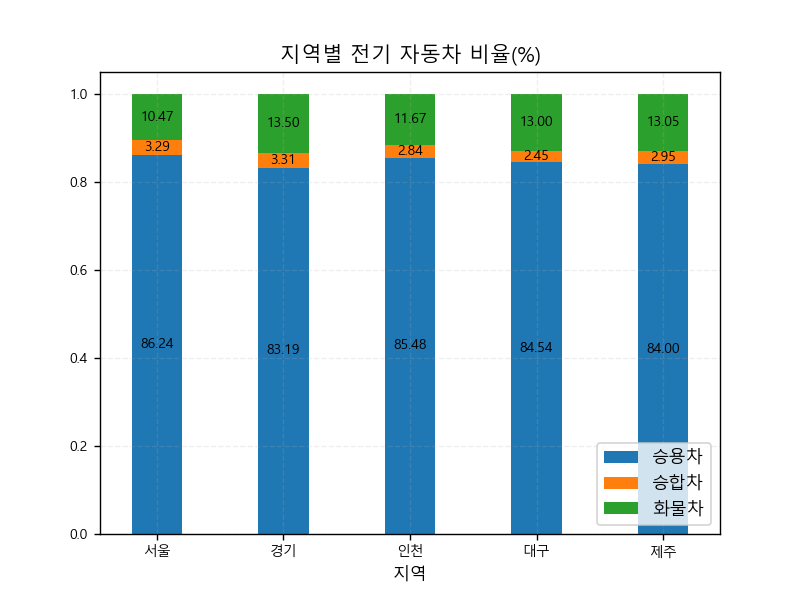

In [112]:
#ax = car_final.plot(x='지역', kind='bar', stacked=True, title='지역별 전기 자동차 비율(%)', width=0.9)
ax = car_4.plot(x='지역', kind='bar', stacked=True, title='지역별 전기 자동차 비율(%)', width=0.4 ,fontsize = 8)
#car_final의 그래프의 xlabel ='지역' bar그래프 형태 

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.2f"%(height*100), xy=(left+width/2, bottom+height/2), ha='center', va='center' , fontsize = 8)

plt.text(5, 5, s='outlier', fontsize=10, fontweight='bold')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.2, linestyle='--')
plt.legend(labels = ['승용차' , '승합차' , '화물차'], loc = 'lower right')